In [1]:
import librosa 

In [12]:
import soundfile
import numpy as np

In [68]:
def concatenate_segments(x, onset_samples, pad_duration=0.500):
    """Concatenate segments into one signal."""
    silence = np.zeros(int(pad_duration*sr)) # silence
    frame_sz = 10000 if len(np.diff(onset_samples)) == 0 else min(np.diff(onset_samples))   # every segment has uniform frame size
    frame_sz = 10000 if frame_sz > 10000 else frame_sz
    #print("fz"+str(frame_sz))
    return np.concatenate([
        np.concatenate([x[i:i+frame_sz], silence]) # pad segment with silence
        for i in onset_samples
    ])

In [422]:
y, sr = librosa.load('/Users/cooky/HDD/Drum/ACID WAV VINYL BREAKS/6-Oldchool Beat (100)/OVB45.wav')
yt = librosa.util.normalize(y)
yt, index = librosa.effects.trim(y=yt, top_db=10)

In [423]:
DEFAULT_SR = 22050
SEED = 41
hop_length = 256

onset_envelope = librosa.onset.onset_strength(y=yt, sr=sr, hop_length=hop_length)
onset_frames = librosa.util.peak_pick(onset_envelope, 50, 50, 50, 50, 1, 3)
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)

/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_12061/3321012246.py:6: FutureWarning: Pass pre_max=50, post_max=50, pre_avg=50, post_avg=50, delta=1, wait=3 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_frames = librosa.util.peak_pick(onset_envelope, 50, 50, 50, 50, 1, 3)


In [424]:
onset_samples

array([ 13056,  37632,  78848, 112384, 137216, 178432, 197120])

In [425]:
ytt = concatenate_segments(yt, onset_samples, 0)

In [426]:
import scipy.io.wavfile
scipy.io.wavfile.write("karplus.wav", DEFAULT_SR, yt)

In [427]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = None

/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_12061/2860673941.py:13: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['image.interpolation'] = None


In [428]:
import librosa.display

/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_12061/3794079410.py:2: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(yt, sr)


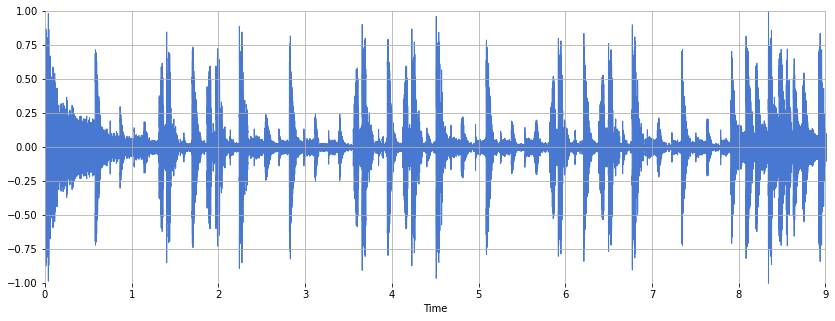

In [429]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(yt, sr)

In [430]:
S = librosa.stft(yt)
logS = librosa.amplitude_to_db(abs(S))

imsi_onset_frames = librosa.onset.onset_detect(yt, sr=sr, pre_avg=1, post_avg=3, pre_max=2, post_max=2, delta=0.04, wait=3)
onset_times = librosa.frames_to_time(imsi_onset_frames)

/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_12061/2773927884.py:4: FutureWarning: Pass y=[ 0.01494067  0.00276988  0.00691632 ... -0.0143012  -0.02387746
 -0.00397532] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  imsi_onset_frames = librosa.onset.onset_detect(yt, sr=sr, pre_avg=1, post_avg=3, pre_max=2, post_max=2, delta=0.04, wait=3)


In [431]:
onset_times

array([0.60371882, 0.90557823, 1.06811791, 1.18421769, 1.34675737,
       1.43963719, 1.62539683, 1.71827664, 1.90403628, 1.9969161 ,
       2.18267574, 2.27555556, 2.43809524, 2.57741497, 2.73995465,
       2.83283447, 3.0185941 , 3.13469388, 3.29723356, 3.43655329,
       3.57587302, 3.69197279, 3.87773243, 3.97061224, 4.15637188,
       4.2492517 , 4.43501134, 4.52789116, 4.71365079, 4.82975057,
       4.99229025, 5.10839002, 5.29414966, 5.41024943, 5.57278912,
       5.68888889, 5.85142857, 5.94430839, 6.13006803, 6.22294785,
       6.43192744, 6.52480726, 6.68734694, 6.80344671, 6.96598639,
       7.10530612, 7.2678458 , 7.36072562, 7.54648526, 7.66258503,
       7.82512472, 7.94122449, 8.10376417, 8.2430839 , 8.35918367,
       8.4985034 , 8.59138322, 8.77714286, 8.93968254])

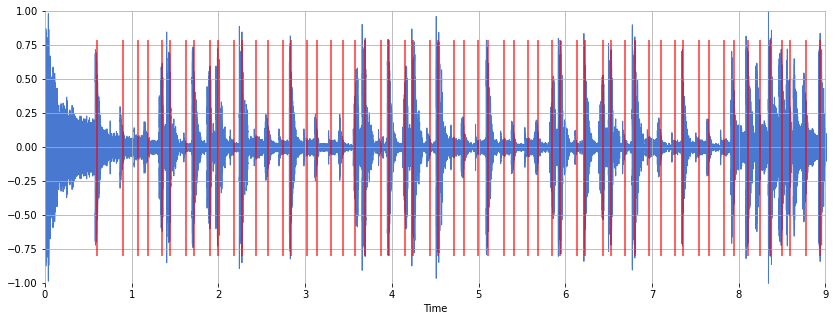

In [432]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(yt, sr=sr)
plt.vlines(onset_times, -0.8, 0.79, color='r', alpha=0.8) 

In [433]:
clicks = librosa.clicks(frames=imsi_onset_frames, sr=sr, length=len(yt))

In [434]:
z = yt + clicks

In [435]:
scipy.io.wavfile.write("ims.wav", DEFAULT_SR, z)